In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [121]:
df=pd.read_csv("health care diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [122]:
df.shape

(768, 9)

In [123]:
type(df)

pandas.core.frame.DataFrame

# Week 1:
# 1.Performing descriptive analysis of dataset¶

In [124]:
df.count().values

array([768, 768, 768, 768, 768, 768, 768, 768, 768], dtype=int64)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [126]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [127]:
df.describe() # data looks valid but some features like glucose , bp , bmi , skinthickness can not have min value as zero.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [128]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [129]:
df[df['Glucose']==0]
#df.groupby('Glucose').get_group(0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [130]:
df = df[~(df['Glucose']==0)].copy()#removing records having glucose 0

In [131]:
df.shape

(763, 9)

In [132]:
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [133]:
df = df[~(df['BloodPressure']==0)].copy()

In [134]:
df[df['SkinThickness']==0]# this is in appreciable number deleting this eill affect the dataset and if removed true analysis would not be done .so not removing these records.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
11,10,168,74,0,0,38.0,0.537,34,1
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [135]:
df.shape # now the new shape of the data is 728 * 9

(728, 9)

In [136]:
df.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 1.2 Visually explore these variables using histograms. Treat the missing values accordingly.
# 1.3 There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.¶¶

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 728 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               728 non-null    int64  
 1   Glucose                   728 non-null    int64  
 2   BloodPressure             728 non-null    int64  
 3   SkinThickness             728 non-null    int64  
 4   Insulin                   728 non-null    int64  
 5   BMI                       728 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       728 non-null    int64  
 8   Outcome                   728 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.9 KB


In [138]:
df['Glucose'].value_counts()

Glucose
100    16
99     15
125    14
106    14
111    14
       ..
61      1
178     1
160     1
182     1
190     1
Name: count, Length: 135, dtype: int64

(array([  4.,  17.,  83., 142., 152., 120.,  83.,  53.,  42.,  32.]),
 array([ 44. ,  59.5,  75. ,  90.5, 106. , 121.5, 137. , 152.5, 168. ,
        183.5, 199. ]),
 <BarContainer object of 10 artists>)

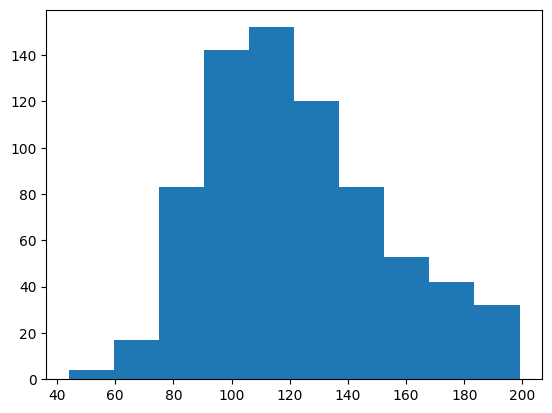

In [139]:
plt.hist(df['Glucose'])

<Axes: ylabel='count'>

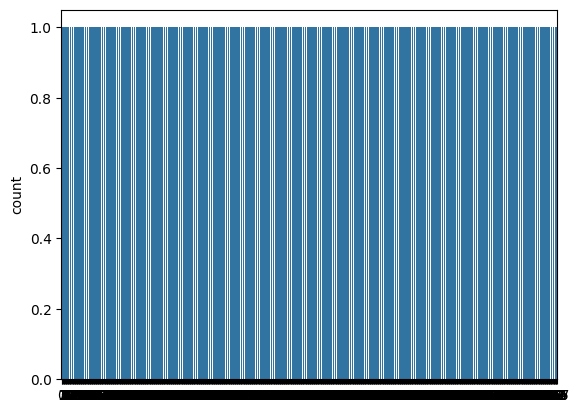

In [140]:
sns.countplot(df['Glucose'])

In [141]:
# we can remove the rows having values 0 in GLUCOSE SINCE these are too less < 30%

In [142]:
df['BloodPressure'].value_counts().head(10)

BloodPressure
70    57
74    51
78    45
72    44
68    43
64    43
76    39
80    39
60    37
62    34
Name: count, dtype: int64

(array([  3.,   2.,  34., 118., 224., 212., 105.,  18.,  10.,   2.]),
 array([ 24. ,  33.8,  43.6,  53.4,  63.2,  73. ,  82.8,  92.6, 102.4,
        112.2, 122. ]),
 <BarContainer object of 10 artists>)

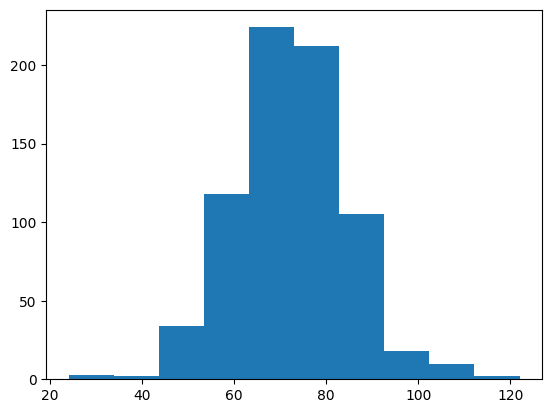

In [143]:
plt.hist(df['BloodPressure'])

In [144]:
# 0 values in blood pressure can be drop since it is rare to have 0 bp and they are <30%b
df['SkinThickness'].value_counts().head()

SkinThickness
0     194
32     30
30     26
27     23
23     21
Name: count, dtype: int64

(array([198., 107., 162., 172.,  77.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

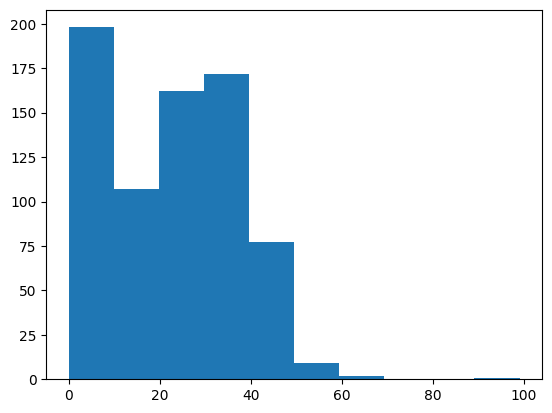

In [145]:
plt.hist(df['SkinThickness'])

<Axes: ylabel='count'>

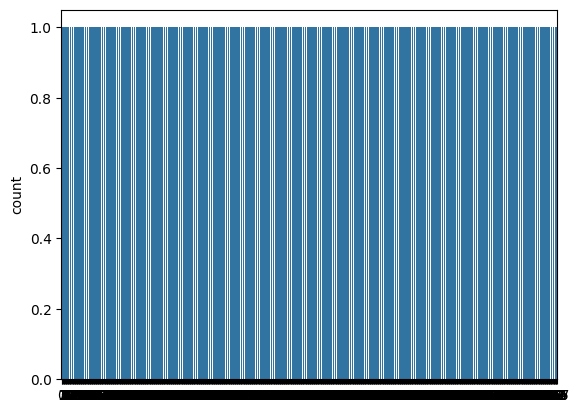

In [146]:
sns.countplot(df['SkinThickness'])

In [147]:
# we can not drop rows where value is 0 in skin thickness since they are appreciably high in numbers >30%

In [148]:
df['Insulin'].value_counts().head()

Insulin
0      335
105     11
130      9
140      9
120      8
Name: count, dtype: int64

(array([447., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

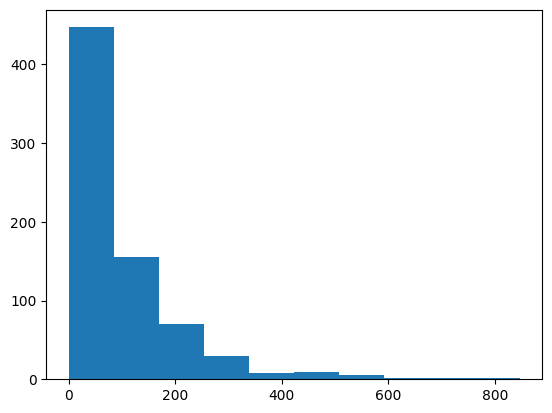

In [149]:
plt.hist(df['Insulin'])

<Axes: ylabel='count'>

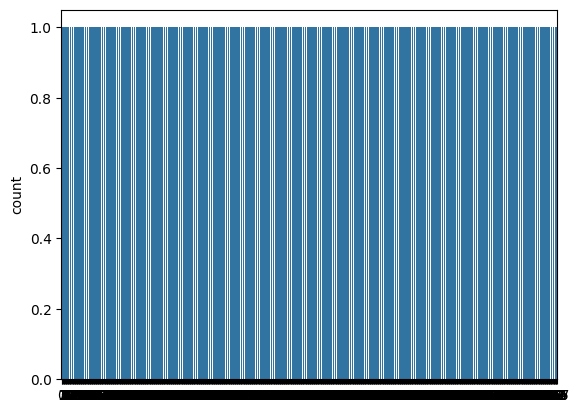

In [150]:
sns.countplot(df['Insulin'])

In [151]:
# we can not remove since value 0 is in large no. and insulin can be zero .

In [152]:
df['BMI'].value_counts().head()

BMI
32.0    12
31.2    12
31.6    12
33.3    10
32.4     9
Name: count, dtype: int64

(array([  4.,   0.,  14., 149., 255., 218.,  73.,  11.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

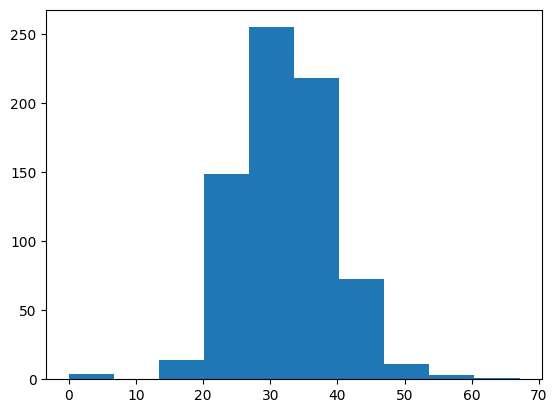

In [153]:
plt.hist(df['BMI'])

(array([294., 201., 129.,  54.,  25.,  15.,   3.,   3.,   1.,   3.]),
 array([0.078 , 0.3122, 0.5464, 0.7806, 1.0148, 1.249 , 1.4832, 1.7174,
        1.9516, 2.1858, 2.42  ]),
 <BarContainer object of 10 artists>)

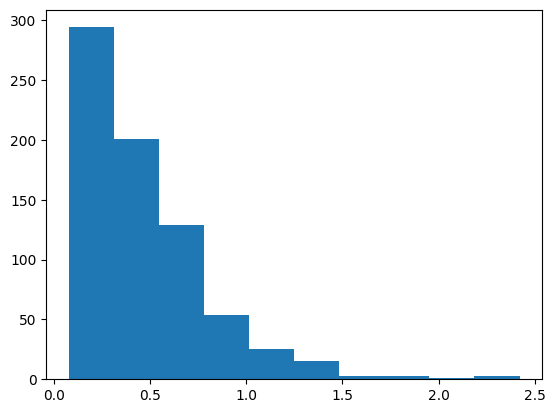

In [154]:
plt.hist(df['DiabetesPedigreeFunction'])

In [155]:
# we can drop rows having 0 in BMI SINCE < 30% .
# THUS Glucose, Blood Pressure,BMI ROWS WITH ZERO CAN BE DROPPED

In [156]:
df_2=df[(df.Glucose !=0)&(df.BloodPressure !=0)&(df.BMI !=0)]
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [157]:
df_2['DiabetesPedigreeFunction'].value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.259    5
0.268    5
0.238    5
        ..
0.926    1
0.282    1
0.427    1
1.213    1
0.171    1
Name: count, Length: 499, dtype: int64

In [158]:
df_2['Age'].value_counts().head(10)
df_2['Age'].shape

(724,)

In [159]:
df_2['Pregnancies'].value_counts()

Pregnancies
1     131
0      99
2      96
3      72
4      65
5      55
6      46
7      42
8      36
9      28
10     22
11     10
13      9
12      9
14      2
15      1
17      1
Name: count, dtype: int64

# Week 2 :
# 2.1 Check the balance of the data by plotting the count of outcomes by their value.

In [160]:
df_2_outcome_1=df_2[df_2.Outcome==1]#shows Diabetes
df_2_outcome_0=df_2[df_2.Outcome==0]#shows non Diabetes

In [161]:
df_2['Outcome'].value_counts()# data is seems to be unbalanced.

Outcome
0    475
1    249
Name: count, dtype: int64

In [162]:
df_2_outcome_1.head()
#df_2_outcome_1.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [163]:
df_2_outcome_0.head()
df_2_outcome_0.shape

(475, 9)

In [164]:
df_2_outcome_1_new=df_2_outcome_1.drop('Outcome',axis=1)
df_2_outcome_1_new.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
6,3,78,50,32,88,31.0,0.248,26
8,2,197,70,45,543,30.5,0.158,53


Text(1, 2, 'Outcome 0 (Not Diabetic patient) Univariate Plots')

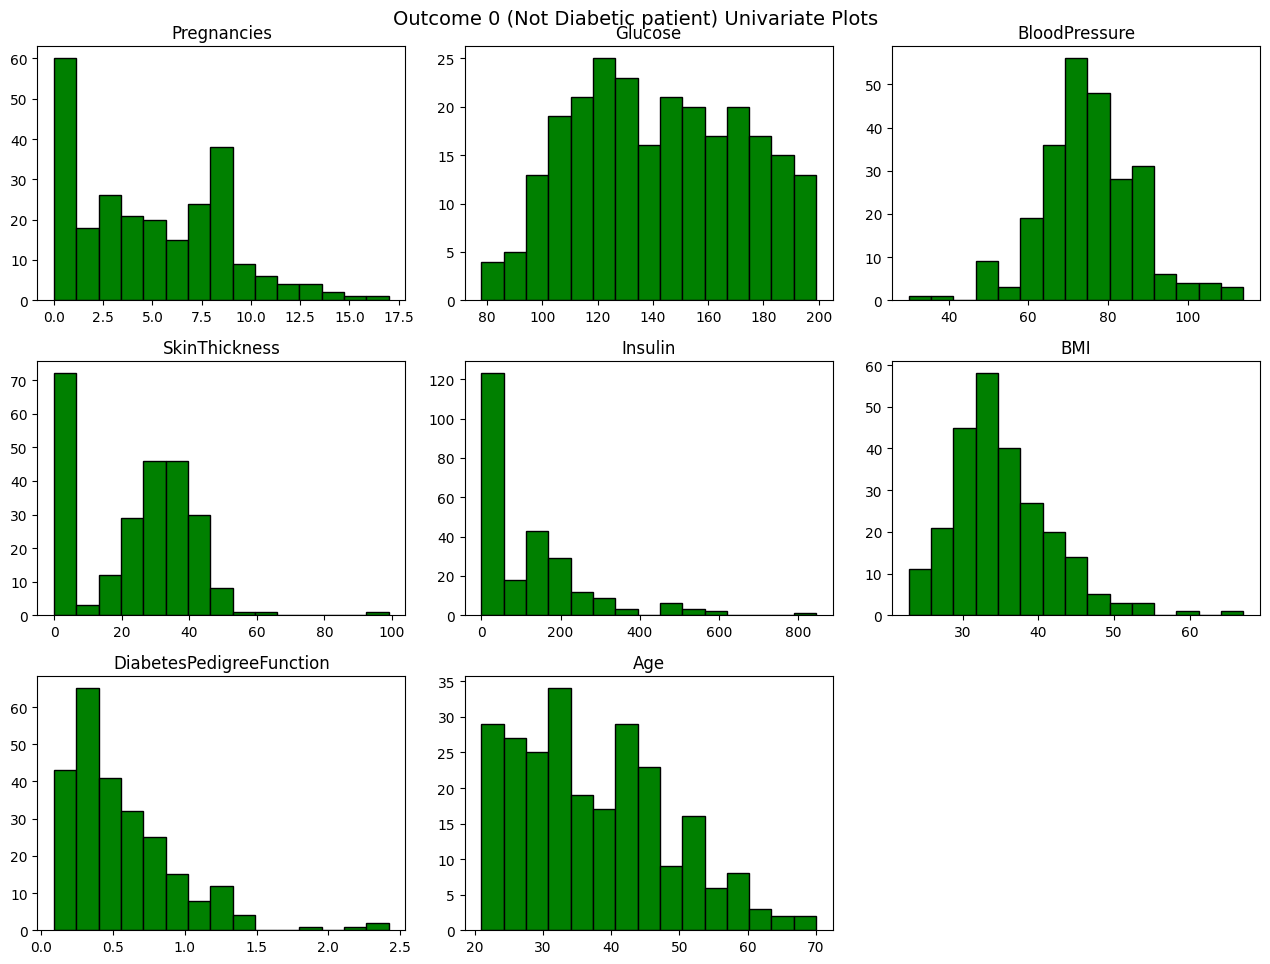

In [165]:
df_2_outcome_1_new.hist(bins=15, 
             color='Green', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=10, 
             ylabelsize=10, 
             grid=False)    

plt.tight_layout(rect=(0, 0,2 , 2)) # it will change the size of the plot

plt.suptitle('Outcome 0 (Not Diabetic patient) Univariate Plots',
             x=1, # title x position
             y=2, # title y position
              fontsize=14)

In [166]:
# Blood Presure, skin thickness,BMI are almost having normal distribution or gaussian distribution
# age,DiabetesPedigreeFunction,insulin,Pregnancies are right skewed

In [167]:
df_2_outcome_0_new=df_2_outcome_0.drop('Outcome',axis=1)
df_2_outcome_0_new.head()
df_2_outcome_0_new.shape

(475, 8)

Text(1, 2, 'Outcome 0 (Not Diabetic patient) Univariate Plots')

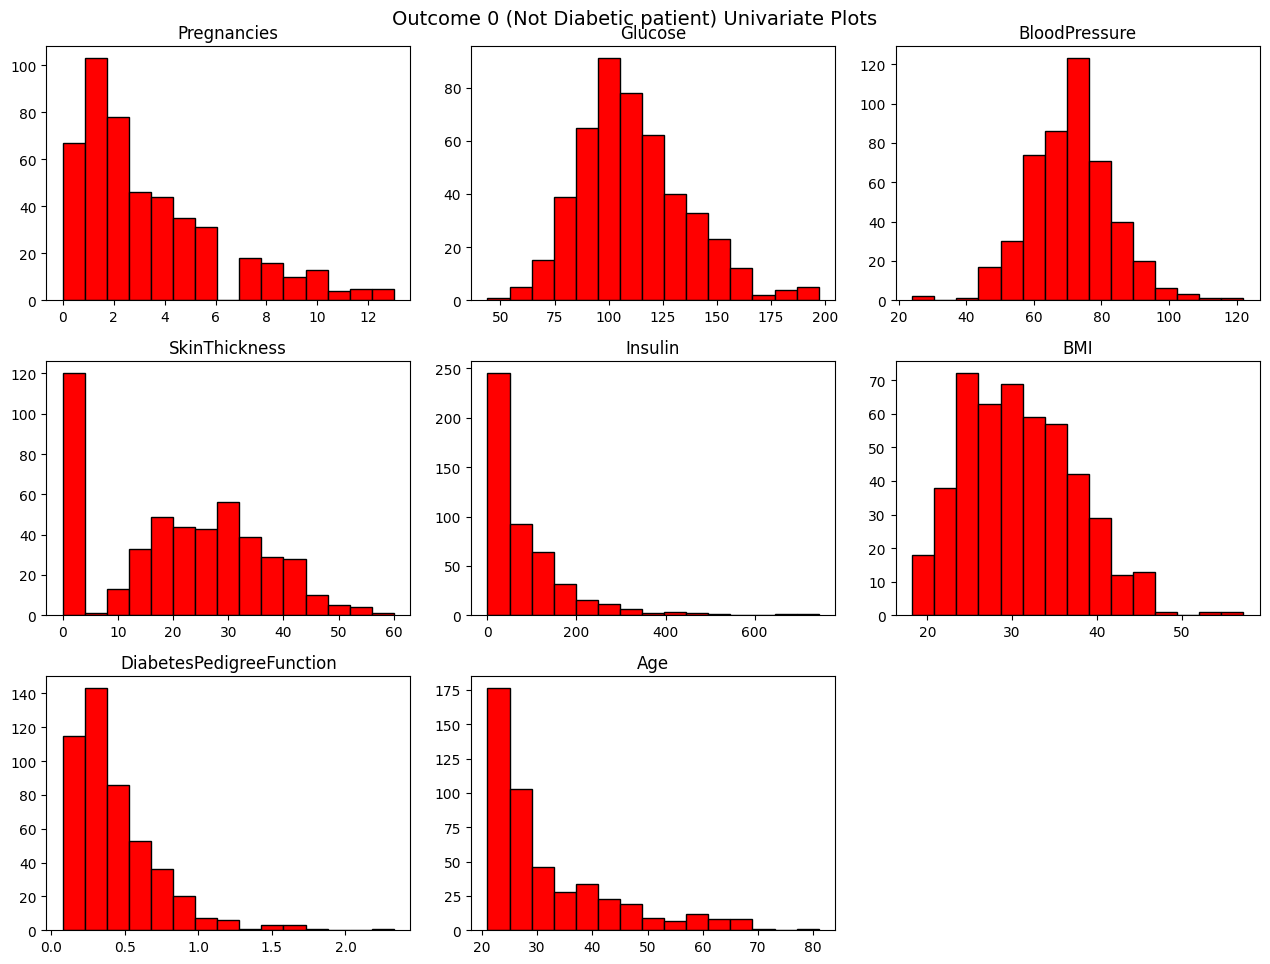

In [168]:
df_2_outcome_0_new.hist(bins=15, 
             color='red', 
             edgecolor='black', 
             linewidth=1.0,xlabelsize=10, 
             ylabelsize=10, 
             grid=False)    

plt.tight_layout(rect=(0, 0,2 , 2)) # it will change the size of the plot

plt.suptitle('Outcome 0 (Not Diabetic patient) Univariate Plots',
             x=1, # title x position
             y=2, # title y position
              fontsize=14)

In [169]:
# age,DiabetesPedigreeFunction,insulin,pregnancies are right skewed 
# BMI,skin thickness,glucose,bloodpressure are following near guassian or normal distribution 

<Axes: >

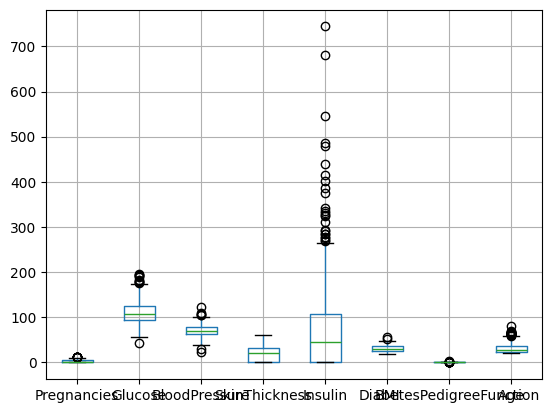

In [170]:
df_2_outcome_0_new.boxplot()
# it does not give clear representation since values of each variable is different

IndexError: index 8 is out of bounds for axis 0 with size 8

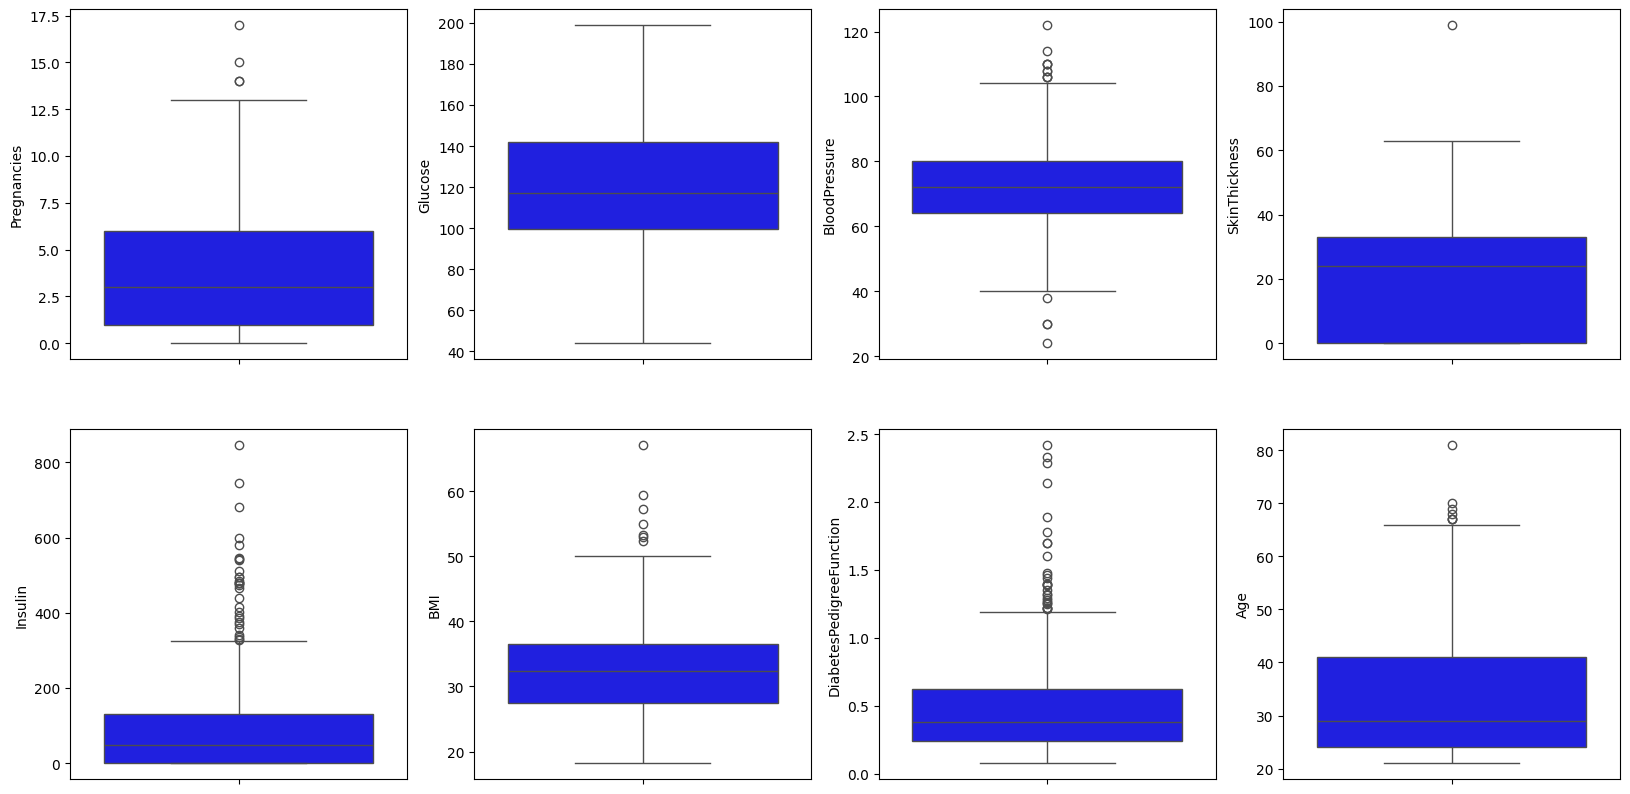

In [171]:
fig , ax = plt.subplots(nrows=2,ncols=4,figsize=(20,10))
ax = ax.flatten()
index=0
for i in df_2.columns:
  sns.boxplot(y=i,data = df_2, ax=ax[index],color='blue')
  index += 1
plt.tight_layout(pad=0.4)#pad is dis bt edges of subplot

In [ ]:
df_2.skew(axis=0,skipna=True)

Pregnancies                 0.905049
Glucose                     0.527117
BloodPressure               0.137629
SkinThickness               0.050349
Insulin                     2.200876
BMI                         0.598186
DiabetesPedigreeFunction    1.921533
Age                         1.088526
Outcome                     0.658511
dtype: float64

<Axes: >

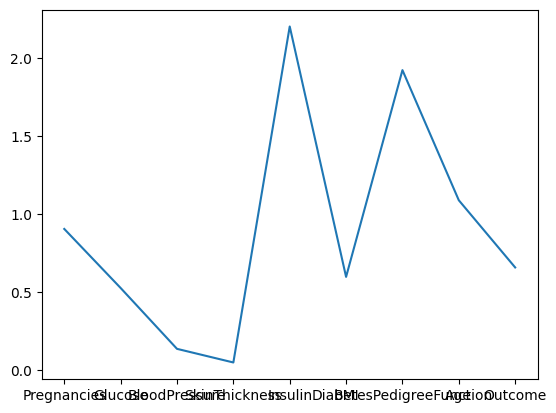

In [ ]:
df_2.skew(axis=0,skipna=True).plot() # thus we see that glucose,bp, skin thickness can be consider to follow normal distribution or symetric while bmi is moderately skew.

In [ ]:
# we see that Pregnancies,Insulin,DiabetesPedigreeFunction are highly skewed . thus removing outliers

<AxesSubplot:xlabel='Insulin'>

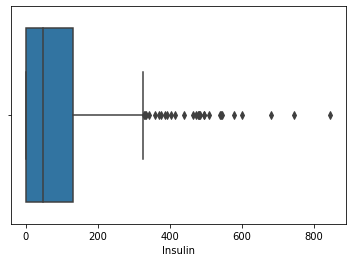

In [ ]:
sns.boxplot(x=df_2.Insulin)

In [ ]:
df_2=df_2.drop(df_2[df_2['Insulin']>300].index)

<AxesSubplot:xlabel='Insulin'>

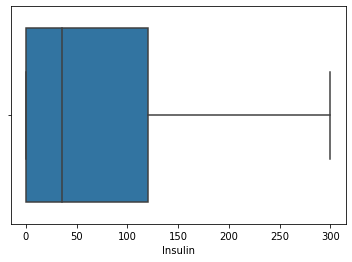

In [ ]:
sns.boxplot(x=df_2.Insulin)

In [ ]:
df_2=df_2.drop(df_2[df_2['DiabetesPedigreeFunction']>1.2].index)

<AxesSubplot:xlabel='BloodPressure'>

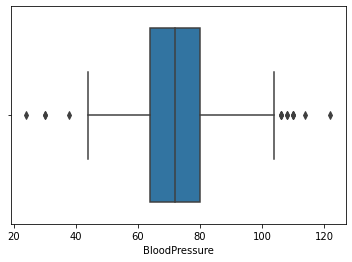

In [ ]:
sns.boxplot(x = df_2.BloodPressure)

In [ ]:
df_2=df_2.drop(df_2[(df_2['BloodPressure']<40) | (df_2['BloodPressure']>102)].index)

<AxesSubplot:xlabel='BloodPressure'>

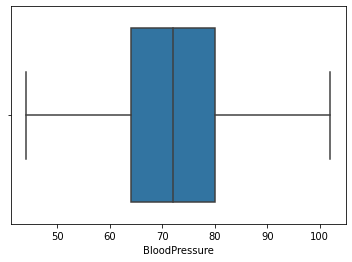

In [ ]:
sns.boxplot(x=df_2.BloodPressure)

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

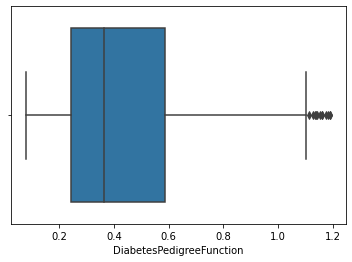

In [ ]:
sns.boxplot(x=df_2.DiabetesPedigreeFunction)

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

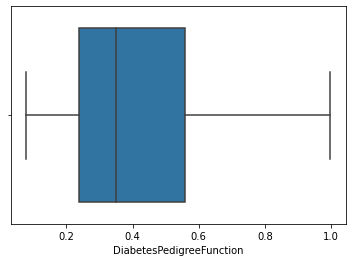

In [ ]:
df_2=df_2.drop(df_2[df_2['DiabetesPedigreeFunction']>1].index)
sns.boxplot(df_2.DiabetesPedigreeFunction)

In [58]:
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Week 3
Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

# Week 4

Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [59]:
# model 1
from sklearn.linear_model import LogisticRegression

In [60]:
lr=LogisticRegression()

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
features = df_2.iloc[:,[0,1,2,3,4,5,6,7]].values
label = df_2.iloc[:,8].values

In [63]:
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=10)
lr.fit(x_train,y_train).score(x_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.796

In [64]:
print(lr.score(x_test,y_test))

0.816


f1=0.618 auc=0.719 ap=0.720


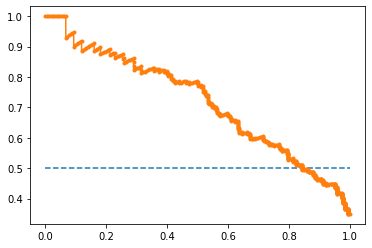

In [80]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = lr.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = lr.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [65]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(label,lr.predict(features))
cm

array([[399,  33],
       [ 92, 101]])

In [66]:
from sklearn.metrics import classification_report
print(classification_report(label,lr.predict(features)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       432
           1       0.75      0.52      0.62       193

    accuracy                           0.80       625
   macro avg       0.78      0.72      0.74       625
weighted avg       0.79      0.80      0.79       625



AUC: 0.879
True Positive Rate - [0.         0.02590674 0.24870466 0.33160622 0.38341969 0.76683938
 0.78238342 0.79274611 0.87564767 0.9015544  0.93264249 0.98963731
 1.        ], False Positive Rate - [0.         0.         0.00231481 0.0162037  0.03472222 0.15972222
 0.16898148 0.17824074 0.26388889 0.3125     0.34722222 0.78240741
 1.        ] Thresholds - [2.         1.         0.97297297 0.76470588 0.61538462 0.60194175
 0.5        0.33333333 0.275      0.25       0.21428571 0.0443038
 0.        ]


Text(0, 0.5, 'True Positive Rate')

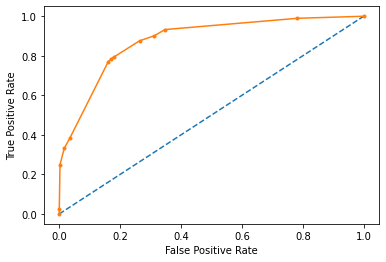

In [78]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(label, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [68]:
# model 2 Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [69]:
model2.score(x_train,y_train)

0.836

In [70]:
model2.score(x_test,y_test)

0.744

f1=0.722 auc=0.791 ap=0.746


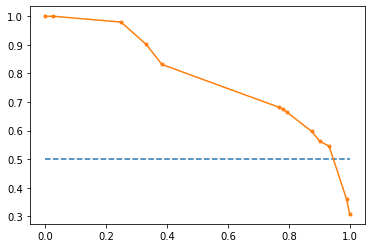

In [81]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model2.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [71]:
# model3 Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=11)
model3.fit(x_train,y_train)

RandomForestClassifier(n_estimators=11)

In [72]:
model3.score(x_train,y_train)

0.996

In [73]:
model3.score(x_test,y_test)

0.784

f1=0.923 auc=0.966 ap=0.958


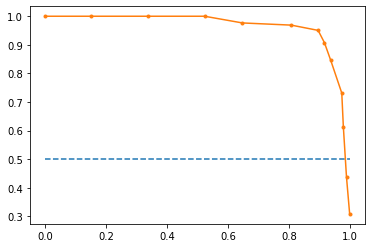

In [82]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model3.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model3.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [74]:
#model4 Support Vector Classifier

from sklearn.svm import SVC 
model4 = SVC(kernel='rbf',
           gamma='auto')
model4.fit(x_train,y_train)

SVC(gamma='auto')

In [75]:
model4.score(x_train,y_train)

1.0

In [76]:
model4.score(x_test,y_test)

0.696

In [77]:
# model5 Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model5.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

f1=0.619 auc=0.737 ap=0.688


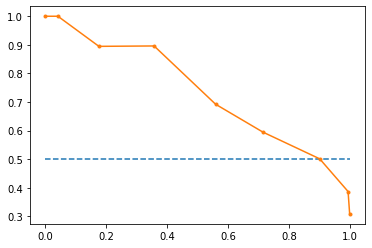

In [83]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model5.predict_proba(features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model5.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probs)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')